In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie_gross_df = pd.read_csv('bom.movie_gross.csv')
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Data cleaning

In [3]:
missing_values = movie_gross_df.isnull().sum()
descriptive_stats = movie_gross_df.describe()

missing_values, descriptive_stats

(title                0
 studio               5
 domestic_gross      28
 foreign_gross     1350
 year                 0
 dtype: int64,
        domestic_gross         year
 count    3.359000e+03  3387.000000
 mean     2.874585e+07  2013.958075
 std      6.698250e+07     2.478141
 min      1.000000e+02  2010.000000
 25%      1.200000e+05  2012.000000
 50%      1.400000e+06  2014.000000
 75%      2.790000e+07  2016.000000
 max      9.367000e+08  2018.000000)

In [4]:
# Remove rows with missing values in 'studio' and 'domestic_gross' columns
movie_gross_df = movie_gross_df.dropna(subset=['studio', 'domestic_gross'])

# replace non-numeric values with NaN
movie_gross_df['foreign_gross'] = pd.to_numeric(movie_gross_df['foreign_gross'], errors='coerce')

# Fill missing values in 'foreign_gross' with the median
median_foreign_gross = movie_gross_df['foreign_gross'].median()
movie_gross_df['foreign_gross'].fillna(median_foreign_gross, inplace=True)

# Check if there are any missing values left
movie_gross_df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

## Descriptive statistics for the numerical variables in the dataset

In [5]:
numerical_stats = movie_gross_df.describe()
numerical_stats

,domestic_gross,foreign_gross,year
count,3.356000e+03,3.356000e+03,3356.000000
mean,2.877149e+07,5.323293e+07,2013.970203
std,6.700694e+07,1.103313e+08,2.479064
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,1.240000e+07,2012.000000
50%,1.400000e+06,1.960000e+07,2014.000000
75%,2.795000e+07,2.970000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


1.Domestic_gross: The average gross revenue in the domestic market is approximately 28.77 million USD, with a standard deviation of 67.01 million USD. The minimum and maximum gross revenues are 100 USD and 936.7 million USD, respectively.

2.Foreign_gross:The average gross revenue in the foreign market is approximately 53.23 million USD, with a standard deviation of 110.33 million USD. The minimum and maximum gross revenues are 600 USD and 960.5 million USD, respectively.

3.Year: The movies in the dataset were released between 2010 and 2018.

# Studios that produce the most movies and generate the most revenue

In [6]:
studio_counts = movie_gross_df['studio'].value_counts().head(10)

studio_revenue = movie_gross_df.groupby('studio')[['domestic_gross',
'foreign_gross']].sum().sort_values(by='domestic_gross', ascending=False).head(10)

studio_counts, studio_revenue

(IFC      166
 Uni.     147
 WB       140
 Magn.    136
 Fox      136
 SPC      123
 Sony     109
 BV       106
 LGF      102
 Par.     101
 Name: studio, dtype: int64,
          domestic_gross  foreign_gross
 studio                                
 BV         1.841903e+10   2.587225e+10
 Uni.       1.290239e+10   1.697237e+10
 WB         1.216805e+10   1.886390e+10
 Fox        1.094950e+10   2.009507e+10
 Sony       8.459683e+09   1.402364e+10
 Par.       7.685871e+09   1.200058e+10
 LGF        4.118963e+09   4.769619e+09
 WB (NL)    3.995700e+09   6.358600e+09
 LG/S       2.078200e+09   3.432124e+09
 P/DW       1.682900e+09   3.393600e+09)

## Number of movies produced by a studio and the total revenue generated.

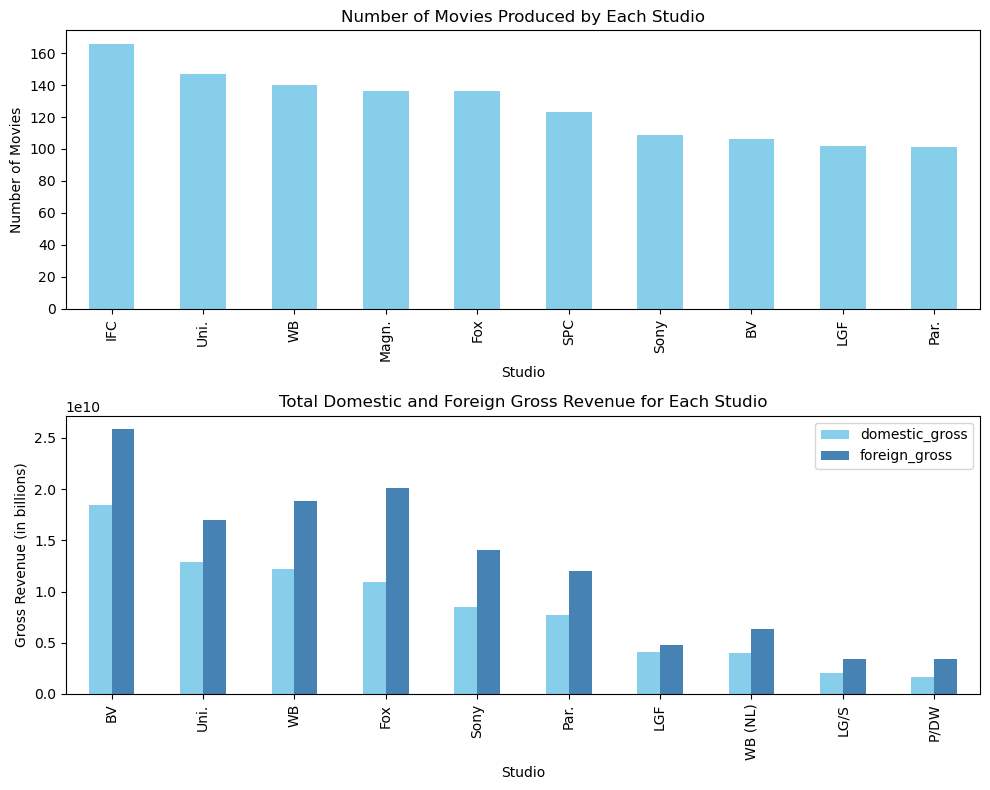

In [7]:
# subplots
fig, axs = plt.subplots(nrows=2, figsize=(10, 8))

# Plot number of movies produced by each studio
studio_counts.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Number of Movies Produced by Each Studio')
axs[0].set_xlabel('Studio')
axs[0].set_ylabel('Number of Movies')

# Plot thetotal domestic and foreign gross revenue for each studio
studio_revenue.plot(kind='bar', ax=axs[1], color=['skyblue', 'steelblue'])
axs[1].set_title('Total Domestic and Foreign Gross Revenue for Each Studio')
axs[1].set_xlabel('Studio')
axs[1].set_ylabel('Gross Revenue (in billions)')

# Display the plots
plt.tight_layout()
plt.show()

1.From the bar charts, we can see that while 'IFC' produced the most movies, it did not generate the most revenue. On the other hand, 'BV' produced fewer movies but generated the highest revenue, both domestically and internationally.

2.The analysis provides a high-level overview of the movie industry, showing the relationship between the number of movies produced by a studio and the revenue generated. It can be used to inform strategic decisions, such as which studios to partner with or invest in.

# Total domestic and foreign gross revenue for each year

In [8]:
yearly_revenue = movie_gross_df.groupby('year')[['domestic_gross', 'foreign_gross']].sum()
yearly_revenue

,domestic_gross,foreign_gross
year,,
2010,1.015683e+10,1.464377e+10
2011,1.006409e+10,1.774047e+10
2012,1.087661e+10,1.994298e+10
2013,1.079233e+10,1.942224e+10
2014,1.033773e+10,2.001427e+10
2015,1.105141e+10,2.028955e+10
2016,1.125365e+10,2.370499e+10
2017,1.093327e+10,2.275133e+10
2018,1.109121e+10,2.014009e+10


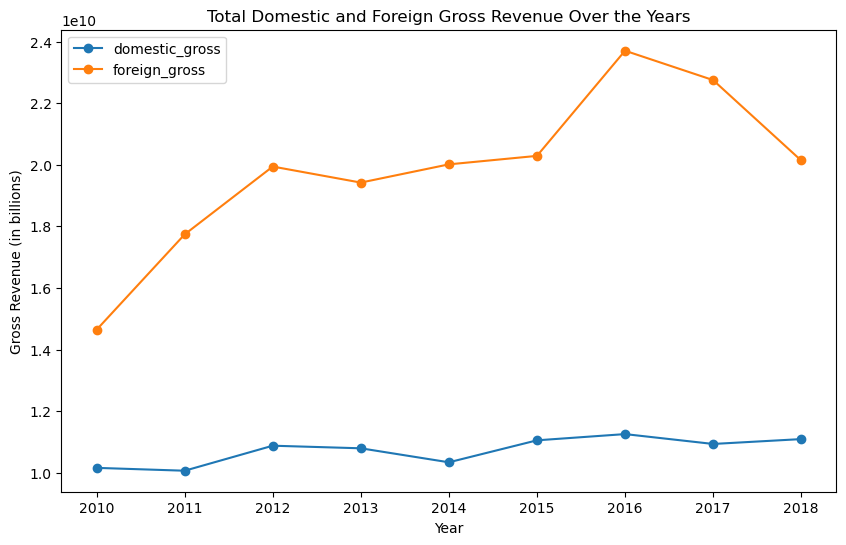

In [10]:
# Plot
yearly_revenue.plot(kind='line', figsize=(10, 6), marker='o')

plt.title('Total Domestic and Foreign Gross Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Gross Revenue (in billions)')

plt.show()

 # Year that had the highest number of movie releases.

In [11]:
yearly_movies = movie_gross_df['year'].value_counts().sort_index()
yearly_movies

2010    322
2011    396
2012    393
2013    345
2014    390
2015    449
2016    433
2017    320
2018    308
Name: year, dtype: int64

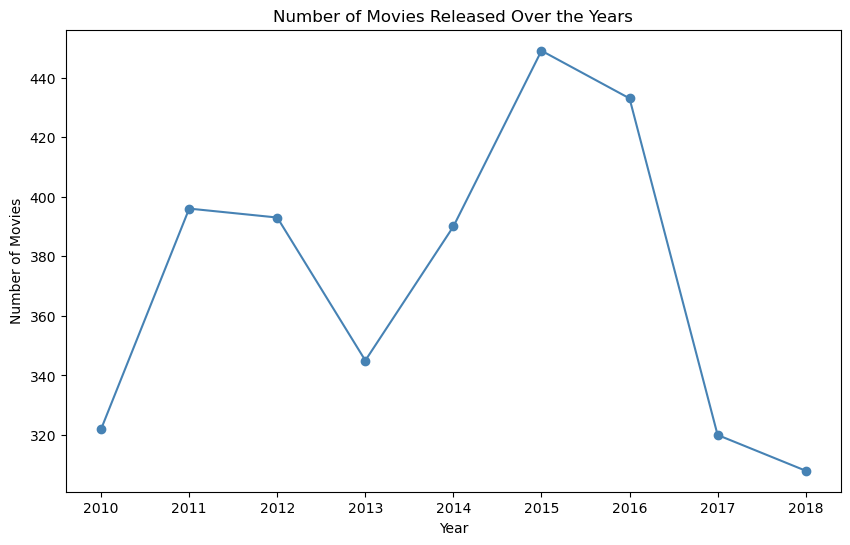

In [12]:
# Plot 
yearly_movies.plot(kind='line', figsize=(10, 6), marker='o', color='steelblue')

plt.title('Number of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Display the plot
plt.show()

## Relationship between Domestic Gross and Foreign Gross

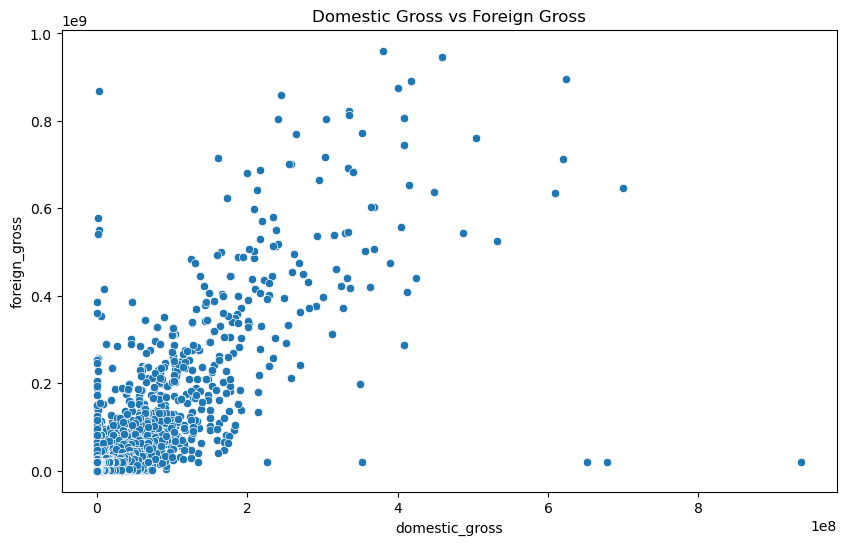

,domestic_gross,foreign_gross,year
domestic_gross,1.000000,0.785615,0.018366
foreign_gross,0.785615,1.000000,0.055285
year,0.018366,0.055285,1.000000


In [13]:
movie_gross_df['foreign_gross'] = pd.to_numeric(movie_gross_df['foreign_gross'], errors='coerce')
correlation = movie_gross_df[['domestic_gross', 'foreign_gross', 'year']].corr()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='domestic_gross', y='foreign_gross', data=movie_gross_df)
plt.title('Domestic Gross vs Foreign Gross')
plt.show()

correlation

1.The correlation between 'domestic_gross' and 'foreign_gross' is approximately 0.785,indicating a strong positive relationship.

2.The correlation between 'domestic_gross' and 'year' is approximately 0.018, indicating a very weak relationship.

3.The correlation between 'foreign_gross' and 'year' is approximately 0.055, indicating a weak relationship.

## ______________________________________________________________

## Based on the analysis, some recommendations for the business include
1.Partner with High-Revenue Studios: Studios like 'BV' have shown to generate high revenues despite producing fewer movies. Partnering with such studios could potentially lead to high returns.

2.Consider the Global Market: The analysis shows that foreign gross revenues have been increasing over the years. This suggests that there is a growing market for movies outside of the domestic market. Therefore, it could be beneficial to consider international trends and preferences when producing movies.

3.Focus on Quality over Quantity: The studio 'IFC' produced the most movies but did not generate the most revenue. This suggests that the number of movies produced does not necessarily correlate with high revenue. Therefore, focusing on the quality of the movies could potentially lead to better financial outcomes.

4.Analyze Yearly Trends: The number of movies released peaked in 2015 and has been slightly decreasing since then. It could be beneficial to further analyze the trends in the movie industry during these years to understand the factors that led to these changes. This could inform future strategies for movie production.

5.Invest in Market Research: Given the fluctuations in both the number of movies produced and the gross revenues, it would be beneficial to invest in market research to better understand the changing trends and preferences in the movie industry. This could help in making informed decisions about which types of movies to produce and when to release them.